# Electronic Band-Structure and Density of States
**by <span style="color:darkgreen">Jürgen Spitaler</span>, <span style="color:darkgreen">Lorenzo Pardini</span>, & <span style="color:darkgreen">Pasquale Pavone</span> for [<span style="color:darkgoldenrod">exciting *fluorine*</span>](http://exciting.wikidot.com/fluorine)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**:  This tutorial gives a basic introduction into electronic-structure calculations. It explains how to set up and execute a simple **`exciting`** calculation, using elemental Ag as example. It is described how to prepare the input, how to run the calculation, and how to analyze the output. In addition, it is shown how basic properties like the density of states and the electronic band structure can be calculated.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**

[0. General Preparation](#0)
    
[1. Electronic Structure of Silver: Ground-State Calculation](#1)
    
[2. Electronic Structure of Silver: Density of States](#2)
    
[3. Electronic Structure of Silver: Band Structure](#3)

</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. General Preparation</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>


**<span style="color:#15317E">Units in exciting</span>**

By default, all quantities in the **`exciting`** code are given in atomic units: **<span style="color:firebrick">Energies</span>** in **<span style="color:firebrick">Hartree</span>**, **<span style="color:firebrick">lengths</span>** in **<span style="color:firebrick">Bohr</span>**, *etc.* (see **[Input Reference](http://exciting.wikidot.com/ref:input)**). In case other units are desirable, they can be converted using templates as a post-processing to **`exciting`**'s standard output.


<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Electronic Structure of Silver: Ground-State Calculation</span>

The first step of any density-functional calculation is the determination of the ground-state total energy and electron density.

The starting point of a ground-state calculation is the crystal structure, only. At the beginning of a ground-state calculation, an initial electron density is generated, which is obtained from a superposition of atomic densities. Thus, this initial electron density lacks the interaction between atoms and is normally a rather crude approximation of the density.

Then, the calculation iteratively goes through the following steps:

   1. Determine the potential from the electron density.
   2. Solve the Kohn-Sham (**KS**) equations to get the eigenfunctions and eigenvalues as well as the total energy.
   3. Calculate the electron density from the **KS** eigenfunctions.
   4. Create a new charge density, mixing the electron density from the current iteration with the ones of previous iteration (to ensure a good convergence behavior).
   5. Start again with (1).

Such a sequence of steps is usually called an **iteration**. The code will repeat such iterations, until the potential (or total energy, or charge density, …) obtained at the end of the last iteration is consistent with the one of the previous iterations. Thus, this kind of calculations is often called **self-consistent field** (**SCF**) calculation, and an iteration is often referred to as an **SCF cycle**.

As a first step, you may create a running directory for the notebook.

In [1]:
%%bash
mkdir -p run_bs_dos

We start by creating an **`exciting`** (**xml**) input file called **input.xml** which should appear as the one below.

<span class="SILVER_ELECTRONIC_STRUCTURE"></span>
```xml
<input>

   <title>Electronic structure of silver</title>

   <structure speciespath="$EXCITINGROOT/species">
      <crystal scale="7.7201">
         <basevect>0.5 0.5 0.0</basevect>
         <basevect>0.5 0.0 0.5</basevect>
         <basevect>0.0 0.5 0.5</basevect>
      </crystal>
      <species speciesfile="Ag.xml" chemicalSymbol="Ag">
         <atom coord="0.0  0.0  0.0" />
      </species>
   </structure>

   <groundstate
      ngridk="8  8  8"
      outputlevel="normal"
      xctype="GGA_PBE_SOL">
   </groundstate>

</input>
```

The next step is writing the complete input as a string and saving it in your working directory as **input.xml**.

In [2]:
import os
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("tutorial_electronic_band_structure_and_density_of_states", "SILVER_ELECTRONIC_STRUCTURE")

# Write out the input as an XML file:
with open(os.path.join(os.getcwd(), 'run_bs_dos/input.xml'), "w") as fid:
    fid.write(input_str)

**<span style="color:firebrick">N.B.</span>**: Do not forget to replace in the input.xml the string **"\$EXCITINGROOT"** by the actual value of the environment variable **$EXCITINGROOT** using the command

In [3]:
%%bash
cd run_bs_dos
python3 -m excitingscripts.setup.excitingroot
cd ..

If the visualization program **XCrySDen** is set up appropriately (find here how to do this: [**XCrySDen Setup for exciting**](https://www.exciting-code.org/xcrysden-setup-for-exciting)), you can visualize the structure in the **`exciting`** input file by executing

In [22]:
%%bash
cd run_bs_dos
xcrysden --exciting input.xml >/dev/null 2>&1 &
cd ..

In order to run **`exciting`** from the terminal, you simply need to execute the **exciting_smp** binary in the running directory. After a few seconds, the calculation should be finished. Here we used the <code>time</code> command before **exciting_smp** in order to get, at the end of the run, the elapsed time explicitly written on the screen.

In [4]:
%%bash
cd run_bs_dos
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml


   Elapsed time = 0m27s


If you wish, you can follow the progress by displaying the output to **INFO.OUT** with the command

<div style="background-color: rgb(224, 224, 224);">

```bash
tail -f INFO.OUT
```
</div>

which needs to be killed after **`exciting`** has stopped using **Ctrl+C**. The calculation should roughly take a few seconds. During the calculation, output files are created, which contain all kind of information on your material system and on the calculation. Some of the output files are already created at the beginning of the calculation and will not be changed anymore during the run. Output files created by **`exciting`** in a standard ground-state calculation are described in **<span style="color:#3366BB">How to start an exciting calculation</span>**.

<a id='2'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">2. Electronic Structure of Silver: Density of States</span>

After you have completed the ground-state run and have obtained the corresponding total energy, you can go for more properties of the system. One of the most fundamental ones is the density of states (**DOS**). The **DOS** gives you information on the energy levels in your system, or — more precisely — about how many electronic states there are at any given energy.

To calculate it, you need to do the following simple modifications in **input.xml** (for more details, see **[Input Reference](http://exciting.wikidot.com/ref:input)**):

   1. add the attribute <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> to the element <code><span style="color:green">groundstate</span></code>;
   2. add the element <code><span style="color:green">properties</span></code> after the <code><span style="color:green">groundstate</span></code> element;
   3. insert the subelement <code><span style="color:green">dos</span></code> into the element <code><span style="color:green">properties</span></code>.
   4. add some attributes to the element <code><span style="color:green">dos</span></code> as shown below.

The corresponding part of the **input.xml** should now look like this:

```xml
...
   <groundstate
      do="skip"
      ngridk="8  8  8"
      outputlevel="normal"
      xctype="GGA_PBE_SOL">
   </groundstate>

   <properties>
      <dos
         nsmdos="2"
         ngrdos="300"
         nwdos="1000"
         winddos="-0.3 0.3">
      </dos>
   </properties>
...
```
Here, the attributes of the element <code><span style="color:green">dos</span></code> have the following meaning (see **[<span style="color:firebrick">here</span>](http://exciting.wikidot.com/ref:input)**) for more details):

   1. <code><span style="color:mediumblue">nsmdos</span></code> indicates the type of smearing for the resulting **DOS**.
   2.  <code><span style="color:mediumblue">ngrdos</span></code> is the effective **k**-point mesh size to be used for Brillouin-zone integration.
   3.  <code><span style="color:mediumblue">nwdos</span></code> is number of energy points in the **DOS**.
   4.  <code><span style="color:mediumblue">winddos</span></code> indicates the energy window, given in Hartree (Ha), for the **DOS** plot.

In [5]:
# The following lines modify the input.xml using Python
dos_str = """<properties>
      <dos
         nsmdos="2"
         ngrdos="300"
         nwdos="1000"
         winddos="-0.3 0.3">
      </dos>
   </properties>
"""

do_skip = input_str.replace('fromscratch','skip')
dos_input = do_skip.replace('</input>', '') + dos_str + "</input>"

with open(os.path.join(os.getcwd(), 'run_bs_dos/input.xml'), "w") as fid:
    fid.write(dos_input)

In [6]:
%%bash
cd run_bs_dos
python3 -m excitingscripts.setup.excitingroot
cd ..

Then, execute **exciting_smp** again:

In [7]:
%%bash
cd run_bs_dos
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(dos):
 
   Total density of states written to TDOS.OUT
 
   Fermi energy is at zero in plot
 
   DOS units are states/Hartree/unit cell
 


   Elapsed time = 0m28s


This time, the program will produce the following files:

filename|description
:-----------|:--------------------------------
**TDOS.OUT**|Total density of states.
**dos.xml**|Total density of states stored in the XML format.

#### <span style="color:#15317E">Plotting the DOS</span>

To visualize the **DOS**, you can execute the following script:

In [8]:
%%bash
cd run_bs_dos
python3 -m excitingscripts.plot.dos
cd ..

The script **`excitingscripts.plot.dos`** is a useful general tool for plotting electronic and phonon density of states. It allows for a bunch of different arguments which are fully described in [**The python script "plot.dos"**](https://www.exciting-code.org/the-python-script-plot.dos). This script produces the **PNG** file **PLOT.png**. You can visualize this file with standard tools, the result should look like this:

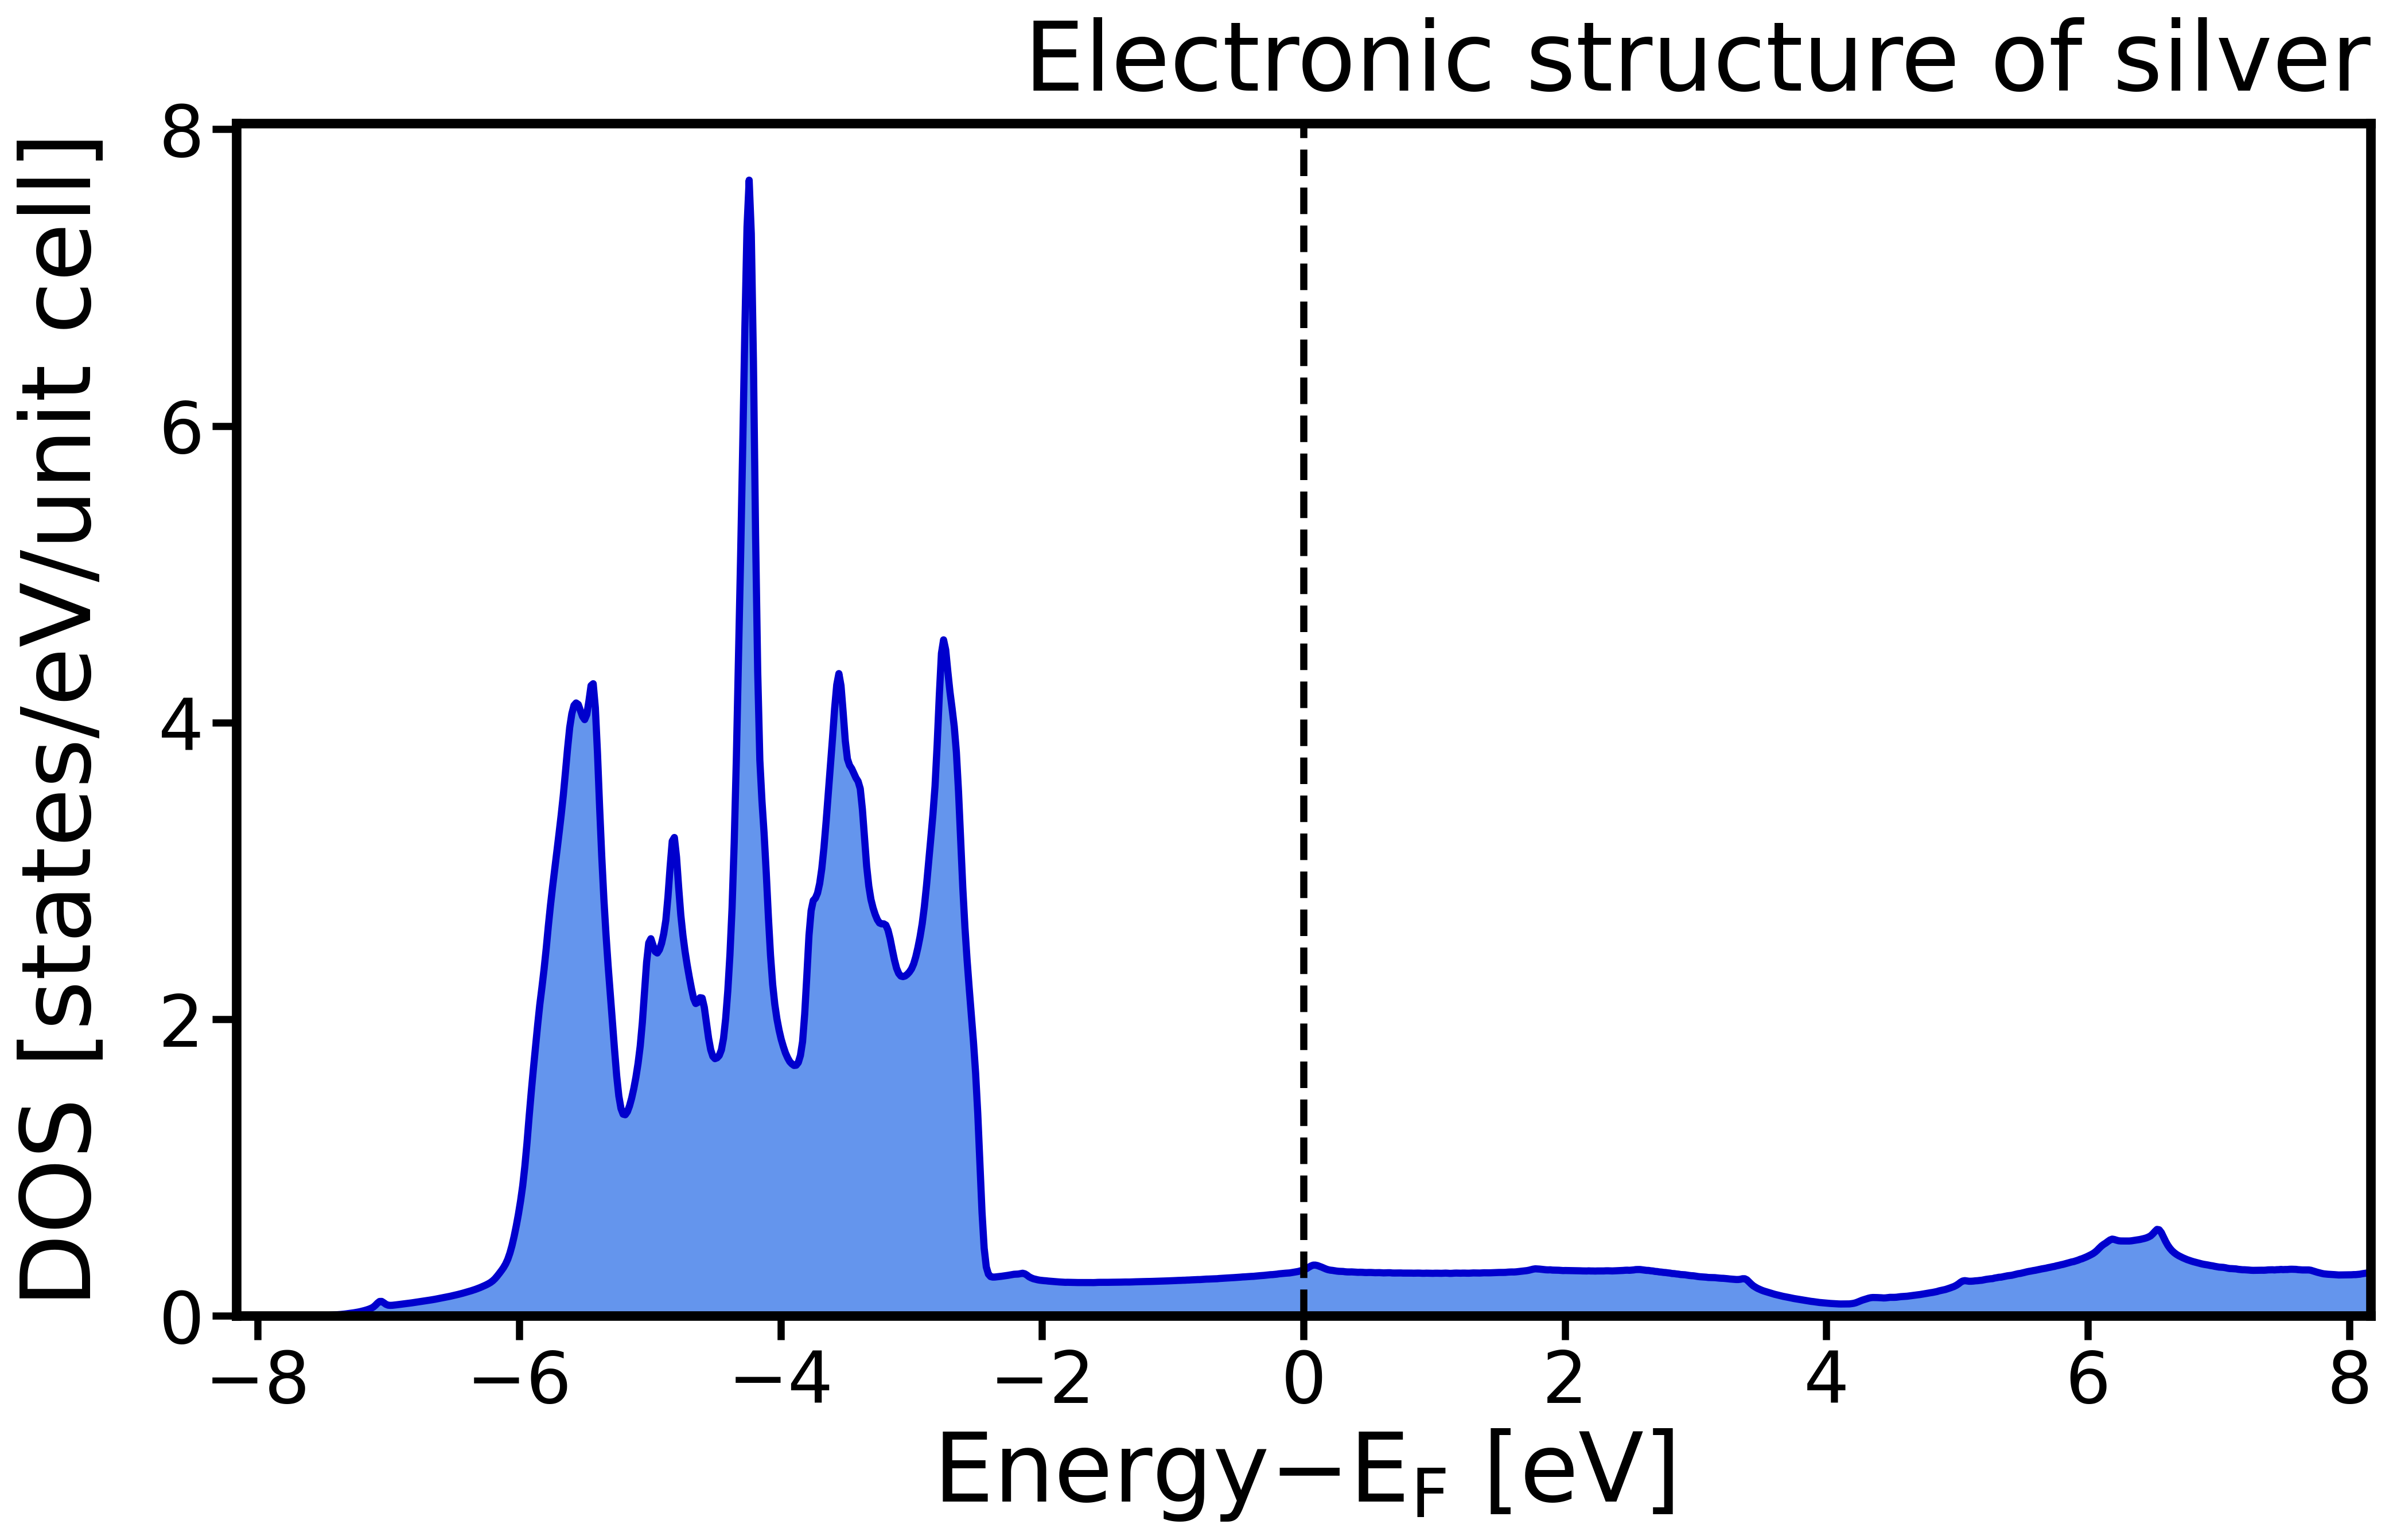

In [9]:
from IPython.display import Image
display(Image('run_bs_dos/PLOT.png', width = 600))

**<span style="color:firebrick">Please note</span>**:

* Here, energies are relative to the Fermi energy, *i.e*., $E_F$ which corresponds to the energy zero.
* As a default, energies in this **DOS** plot are given in **<span style="color:firebrick">electronvolts</span>** (eV) as it is used in most of the literature.
* If you desire to plot energies in Hartrees, use the following command instead

<div style="background-color: rgb(224, 224, 224);">

```bash
python3 -m excitingscripts.plot.dos -eu Ha
```
</div>

**<span style="color:green">Exercise</span>**:
* We were using the attribute <code><span style="color:mediumblue">do</span>=<span style="color:firebrick">"skip"</span></code> for the element <code><span style="color:green">groundstate</span></code> for generating the **DOS** after the ground-state **SCF** run. Find out why, by searching for the element groundstate in [**Input Reference**](http://exciting.wikidot.com/ref:input) and proceeding to its attribute <code><span style="color:mediumblue">do</span></code>.

<a id='3'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">3. Electronic Structure of Silver: Band Structure</span>

Now, we are ready for a more detailed view on the electronic structure: The band structure. In addition to the energy of each state, the band structure shows the dependence of the energy eigenvalues on the coordinates in **k**-space.

To calculate the band structure of silver, insert the subelement <code><span style="color:green">bandstructure</span></code> in the element <code><span style="color:green">properties</span></code> with the following specifications:

```bash
...
   <properties>

      <bandstructure>
         <plot1d>
            <path steps="100">
               <point coord="1.0     0.0     0.0" label="Gamma"/>
               <point coord="0.625   0.375   0.0" label="K"/>
               <point coord="0.5     0.5     0.0" label="X"/>
               <point coord="0.0     0.0     0.0" label="Gamma"/>
               <point coord="0.5     0.0     0.0" label="L"/>
            </path>
         </plot1d>
      </bandstructure>

   </properties>
...
```

As you may have realized, we have removed the subelement <code><span style="color:green">dos</span></code> now. The new element <code><span style="color:green">bandstructure</span></code> allows for the calculation of energy eigenvalues as a function of **k**. Inside this element, the subelement <code><span style="color:green">plot1d</span></code> creates a line plot where the abscissa is taken along a path consisting of straight lines joining the points defined by each element <code><span style="color:green">point</span></code>. The coordinates of these points are given in terms of the basis vectors of the reciprocal lattice. The number of points along the full path, for which the ordinate(s) of the line plot (in this case the **KS** energies) are calculated, is established by the element <code><span style="color:green">path</span></code>.

Here, we choose a simple **path** containing the directions in reciprocal space with the highest symmetry. Standard paths in reciprocal space for general crystals can be found in **[Setyawan & Curtarolo, Comp. Mat. Sci. 49, 299-312 (2010)](http://materials.duke.edu/auro/AUROARTICULA/j.commatsci.2010.05.010.pdf)**. For a face-centered cubic crystal, as in the example of this tutorial, the path is visualized in the following figure.

<div>
<img src="tutorial_images/standards.png" width="500" align="left"/>
</div>

Now, write out the new input as an **XML** file and run the **`exciting`** code again.

In [10]:
band_str = """<properties>
      <bandstructure>
         <plot1d>
            <path steps="100">
               <point coord="1.0     0.0     0.0" label="Gamma"/>
               <point coord="0.625   0.375   0.0" label="K"/>
               <point coord="0.5     0.5     0.0" label="X"/>
               <point coord="0.0     0.0     0.0" label="Gamma"/>
               <point coord="0.5     0.0     0.0" label="L"/>
            </path>
         </plot1d>
      </bandstructure>
   </properties>
"""

band_input = do_skip.replace('</input>', '') + band_str + "</input>"

with open(os.path.join(os.getcwd(), 'run_bs_dos/input.xml'), "w") as fid:
     fid.write(band_input)

In [11]:
%%bash
cd run_bs_dos
python3 -m excitingscripts.setup.excitingroot
cd ..

In [12]:
%%bash
cd run_bs_dos
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(bandstr):
 band structure plot written to BAND.OUT
 
 Fermi energy is at zero in plot
 
 Vertex location lines written to BANDLINES.OUT
 


   Elapsed time = 0m26s


#### <span style="color:#15317E">Plotting the Band Structure</span>

To visualize the band-structure (which is written inside the file **BAND.OUT**), you can use the following script:

In [13]:
%%bash
cd run_bs_dos
python3 -m excitingscripts.plot.band_structure 
cd ..

The script **`excitingscripts.plot.band_structure`** is a useful general tool for plotting electronic and phonon band-structures. It allows for a bunch of different arguments which are fully described in [**The python script "plot.band_structure"**](https://www.exciting-code.org/the-python-script-plot.band_structure). This script produces the **PNG** file **PLOT.png**. You can visualize this file with standard tools, the result should look like this:

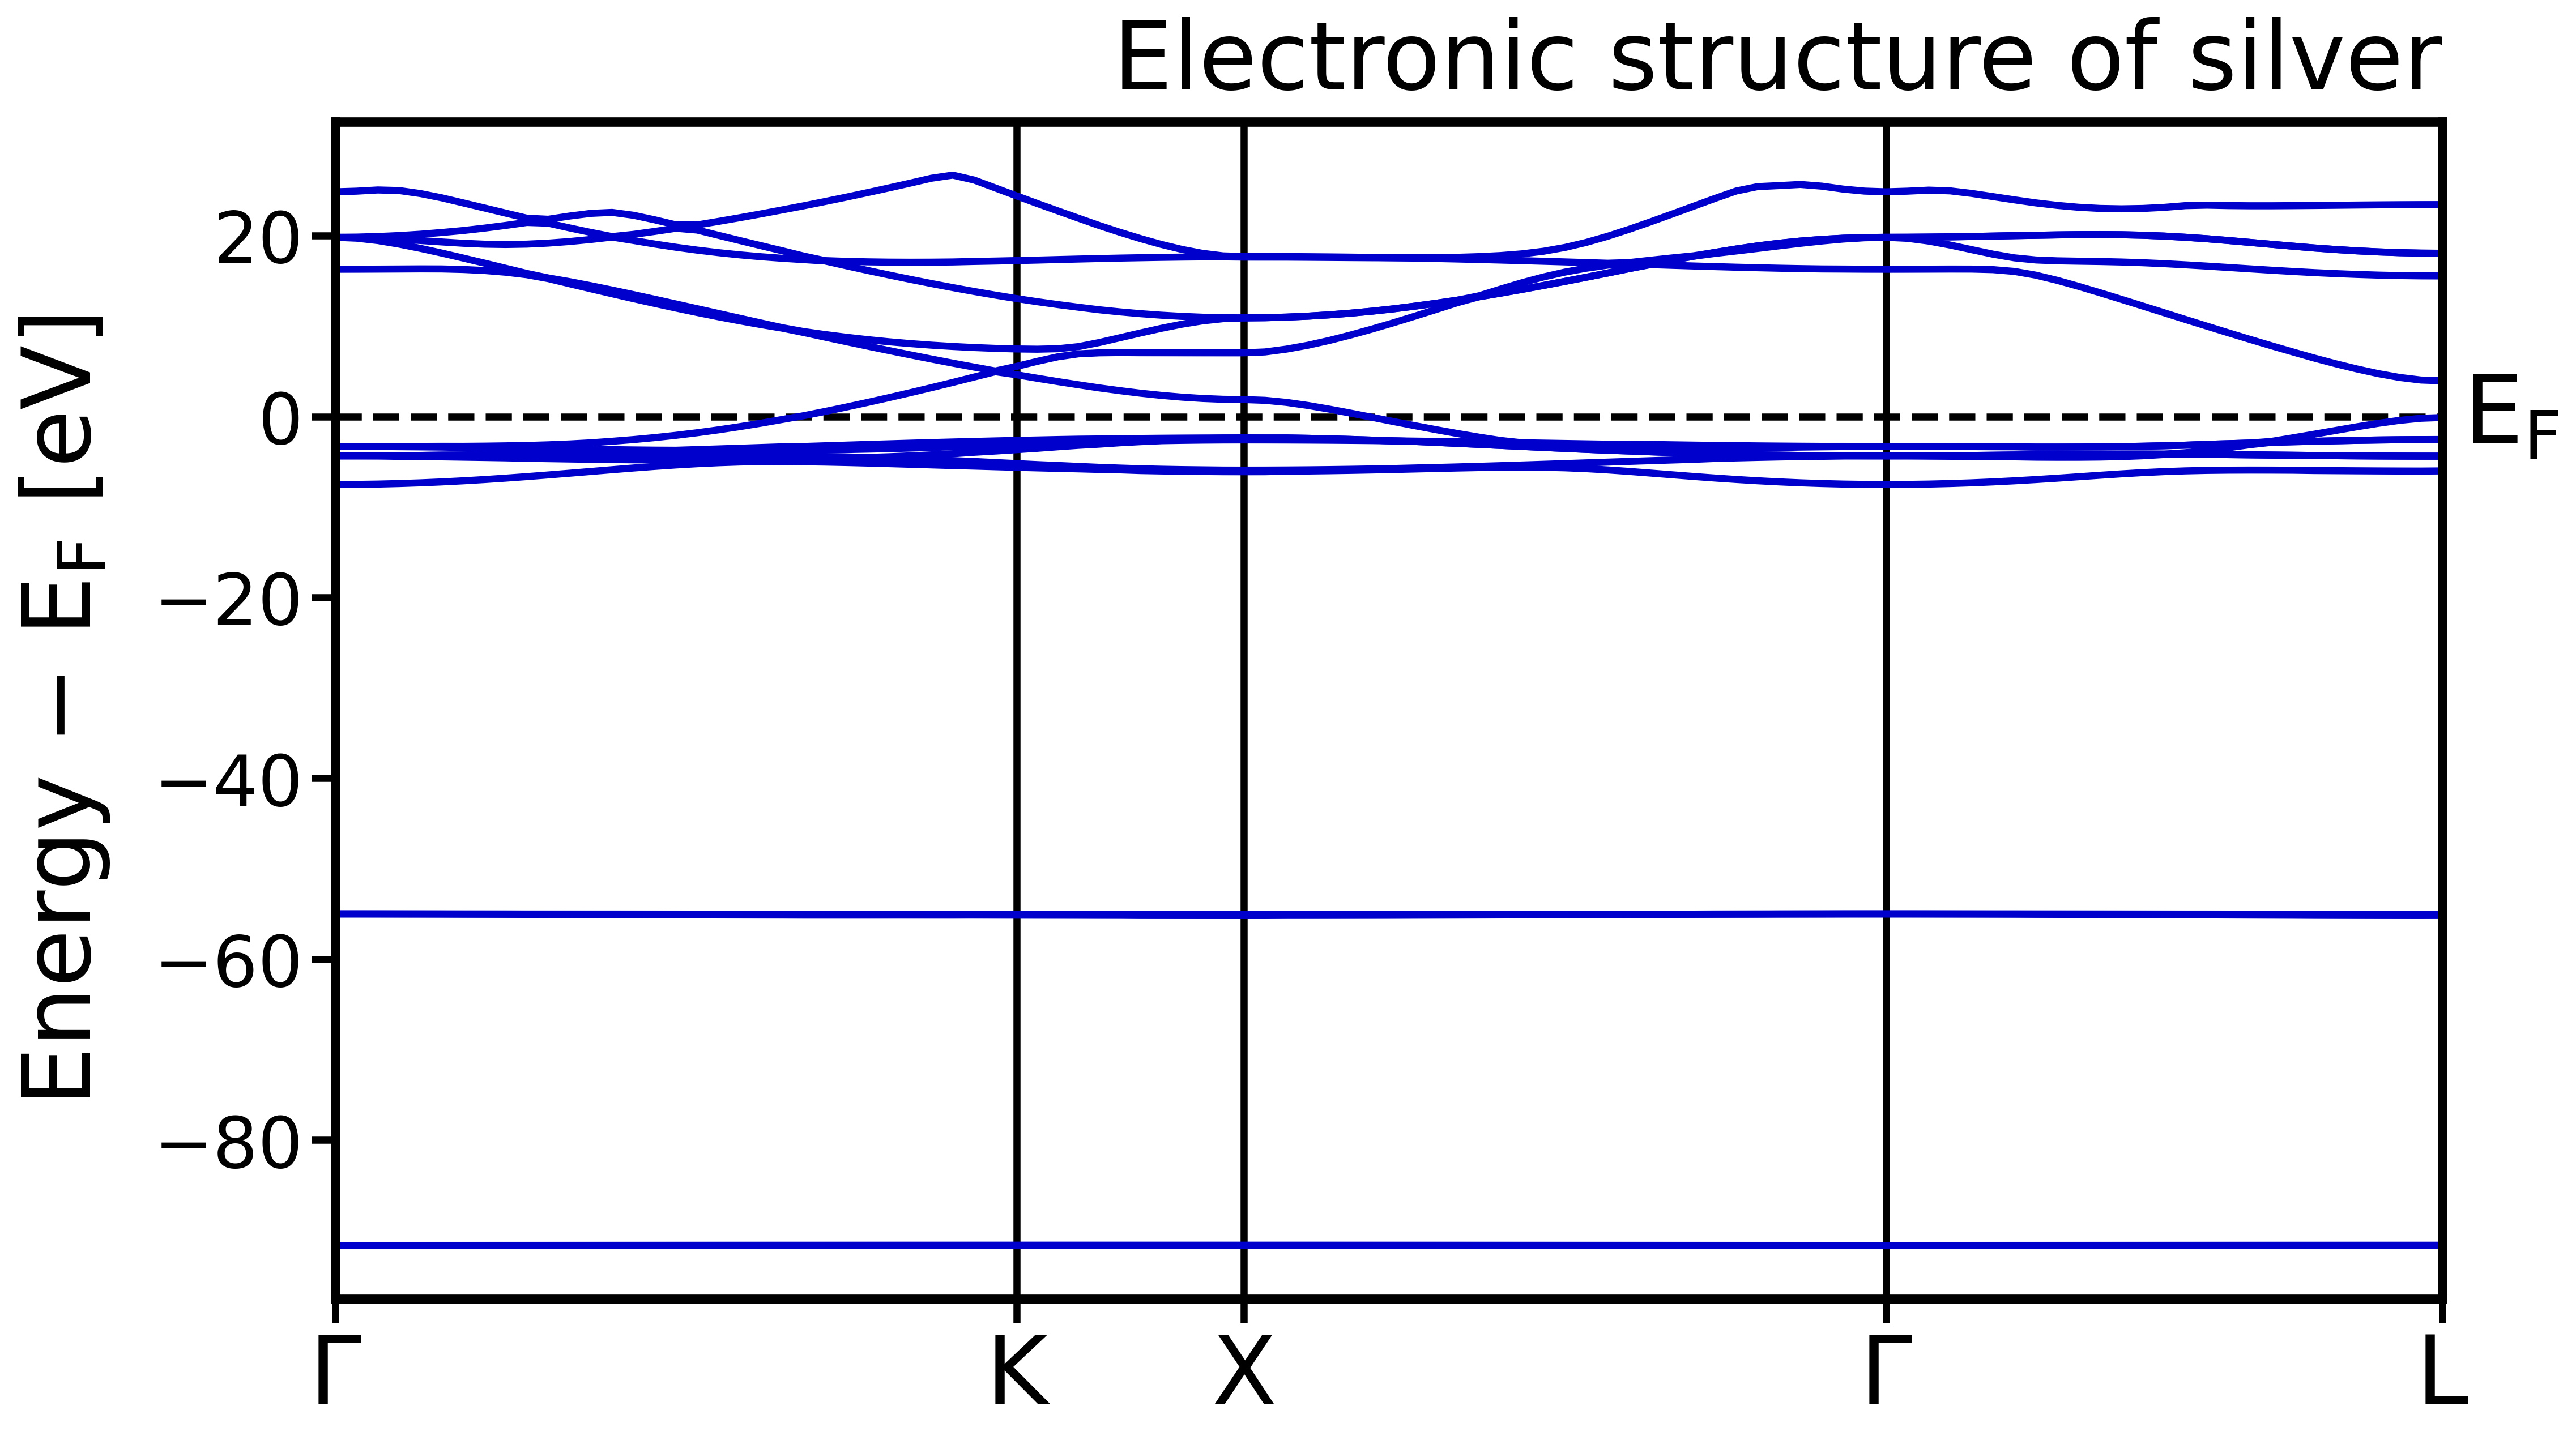

In [14]:
display(Image('run_bs_dos/PLOT.png', width = 600))

By looking at the energy units in this plot, you can notice again that, as a default, electronvolts (eV) are used. We stick to this choice in all the tutorials.

If you wish more details on the energy region close to the Fermi Energy $E_F$, you can add a minimum and maximum energy in the command line.

In [15]:
%%bash
cd run_bs_dos
python3 -m excitingscripts.plot.band_structure -e -10 20

This obtains the following image.

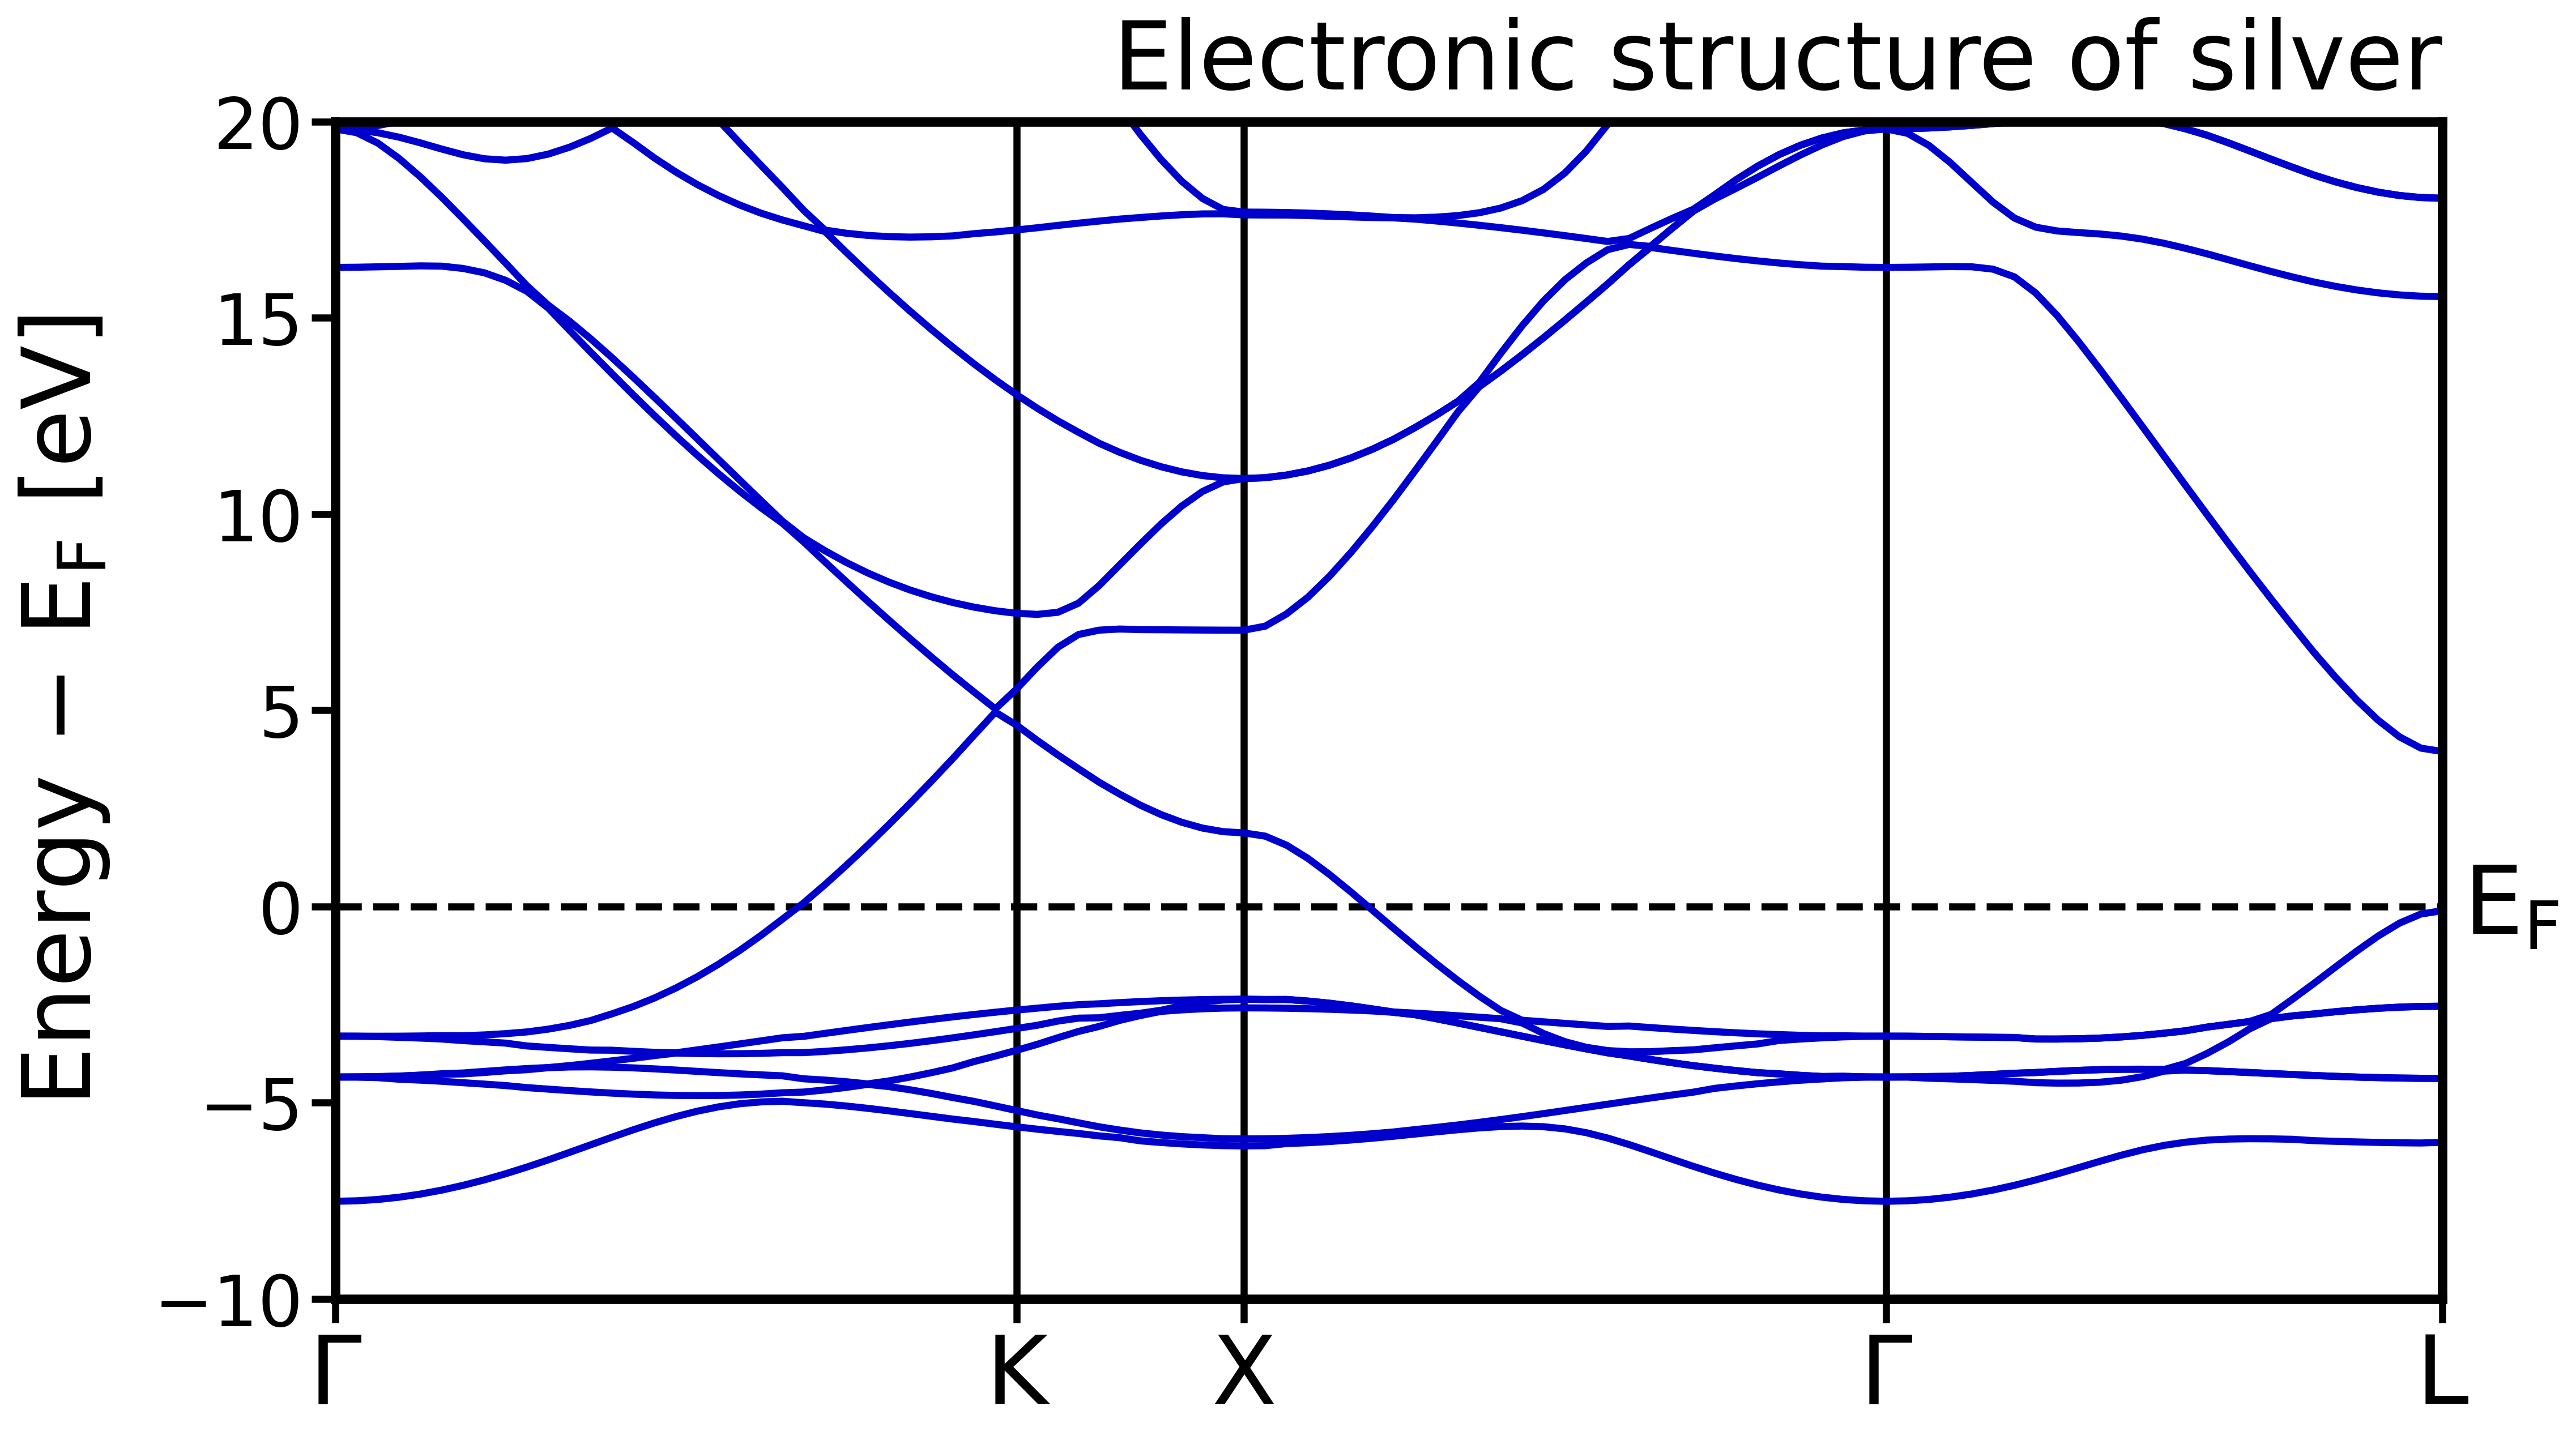

In [16]:
display(Image('run_bs_dos/PLOT.png', width = 600))

**<span style="color:green">Exercises</span>**:
* Use the [**Bilbao Crystallographic Server**](https://www.cryst.ehu.es/) -> **Space-group symmetry** -> **KVEC** to find out about the location of the special **k**-points within the Brillouin zone. The space group of Ag is **225**, **Fm-3m**. Select **Choose** to choose the corresponding spacegroup, and then click **Brillouin zone** to see the Brillouin zone with the special k-points.
* Look at the dispersion of the bands for low energies and high energies:
     1.  What trend do you see relating the band width to the energy?
     2.  How can you explain this trend (think about how the "dispersion" of an isolated atom would look like…)?
